# Demo notebook

In [161]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder


In [162]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.src.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *

## Random test

In [163]:
data, labels = dynamic_generate_positive_gaussian_data(
    dim=3,
    nb_classes=3,
    nb_points_per_class=100,
    seed=42
)
data = batch_norm(data)
data[:5]

array([[0.        , 1.        , 0.01959192],
       [1.        , 0.        , 0.4070175 ],
       [0.        , 0.38090406, 1.        ],
       [0.6965442 , 0.        , 1.        ],
       [0.        , 1.        , 0.99405304]])

In [164]:
choquet = Choquet(X=data[0], mu=generate_capacity(enumerate_permute_unit(data[0])))
print(choquet.choquet)
# choquet.Choquet_classic(verbose=True)

0.6829577134340568


In [165]:
mu=generate_capacity(enumerate_permute_unit(data[0]))
sim = S1(X=data[0], Y=data[10], mu=mu)
print(sim.score())

0.95928034189108


In [11]:
for i in range(10):
    sim = S1(X=data[0], Y=data[i], mu=mu)
    print(sim.score())

0.9829879140227242
0.13631749705671783
0.3631454084702933
0.34187422343143625
0.040414722876863644
0.04813785531700351
0.6544513092086385
0.42951930009951955
0.8375978998893324
0.33812551766358045


In [12]:
knn = KNNFuzz(input_dimension=4, mu=mu)
knn.train(data, labels)

Leave one out avec k = 1
SimLevel1: 0.31333333333333335
SimLevel2: 0.3566666666666667
SimLevel3: 0.31333333333333335

Result in 14.1160 seconds.
Leave one out avec k = 2
SimLevel1: 0.36333333333333334
SimLevel2: 0.36
SimLevel3: 0.36333333333333334

Result in 13.7086 seconds.
Leave one out avec k = 3
SimLevel1: 0.33666666666666667
SimLevel2: 0.36
SimLevel3: 0.33666666666666667

Result in 13.7178 seconds.
Leave one out avec k = 4
SimLevel1: 0.3433333333333333
SimLevel2: 0.35333333333333333
SimLevel3: 0.3433333333333333

Result in 13.6619 seconds.
Leave one out avec k = 5
SimLevel1: 0.35333333333333333
SimLevel2: 0.30333333333333334
SimLevel3: 0.35333333333333333

Result in 13.9427 seconds.
Leave one out avec k = 6
SimLevel1: 0.38333333333333336
SimLevel2: 0.3
SimLevel3: 0.38333333333333336

Result in 13.9749 seconds.
Leave one out avec k = 7
SimLevel1: 0.35333333333333333
SimLevel2: 0.39666666666666667
SimLevel3: 0.35333333333333333

Result in 13.7043 seconds.
Leave one out avec k = 8
Si

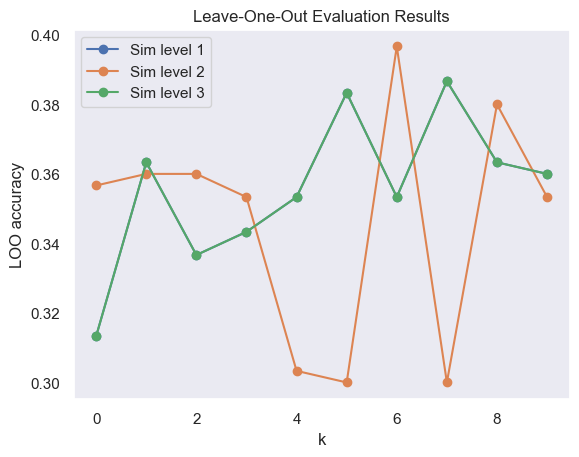

In [13]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data, labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data, labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data, labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test on iris

In [14]:
iris = load_iris(as_frame=True)  # returns a dict-like object
df = iris.frame  # get as pandas DataFrame

X = df.drop(columns='target')  # features
y = df['target']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [15]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 150 samples in 4D space.


Leave one out avec k = 1
SimLevel1: 0.6666666666666666
SimLevel2: 0.52
SimLevel3: 0.6666666666666666

Result in 3.7112 seconds.
Leave one out avec k = 2
SimLevel1: 0.6666666666666666
SimLevel2: 0.68
SimLevel3: 0.6666666666666666

Result in 3.9985 seconds.
Leave one out avec k = 3
SimLevel1: 0.6666666666666666
SimLevel2: 0.66
SimLevel3: 0.6666666666666666

Result in 3.5786 seconds.
Leave one out avec k = 4
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6666666666666666

Result in 3.6180 seconds.
Leave one out avec k = 5
SimLevel1: 0.6666666666666666
SimLevel2: 0.68
SimLevel3: 0.6666666666666666

Result in 3.5622 seconds.
Leave one out avec k = 6
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6666666666666666

Result in 3.5601 seconds.
Leave one out avec k = 7
SimLevel1: 0.66
SimLevel2: 0.49333333333333335
SimLevel3: 0.66

Result in 3.7481 seconds.
Leave one out avec k = 8
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimL

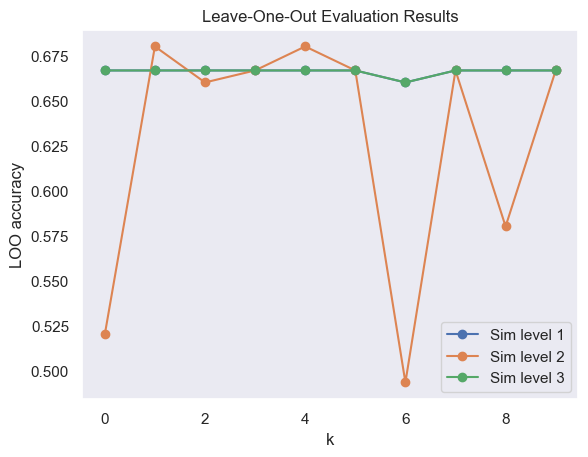

In [16]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test penguins

In [17]:
penguins = load_penguins()
penguins

# Encode
le = LabelEncoder()
le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

# Remove missing values
penguins = penguins.dropna()  # remove rows with missing values
X = penguins.drop(columns='species')  # features
y = penguins['species']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [18]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 342 samples in 7D space.


Leave one out avec k = 1
SimLevel1: 0.43859649122807015
SimLevel2: 0.5818713450292398
SimLevel3: 0.43859649122807015

Result in 184.9580 seconds.
Leave one out avec k = 2
SimLevel1: 0.6695906432748538
SimLevel2: 0.5964912280701754
SimLevel3: 0.6695906432748538

Result in 183.6652 seconds.
Leave one out avec k = 3
SimLevel1: 0.5760233918128655
SimLevel2: 0.5233918128654971
SimLevel3: 0.5760233918128655

Result in 184.4748 seconds.
Leave one out avec k = 4
SimLevel1: 0.4415204678362573
SimLevel2: 0.49122807017543857
SimLevel3: 0.4415204678362573

Result in 185.0040 seconds.
Leave one out avec k = 5
SimLevel1: 0.5701754385964912
SimLevel2: 0.43567251461988304
SimLevel3: 0.5701754385964912

Result in 184.6943 seconds.
Leave one out avec k = 6
SimLevel1: 0.5146198830409356
SimLevel2: 0.4093567251461988
SimLevel3: 0.5146198830409356

Result in 182.7883 seconds.
Leave one out avec k = 7
SimLevel1: 0.35964912280701755
SimLevel2: 0.39473684210526316
SimLevel3: 0.35964912280701755

Result in 184

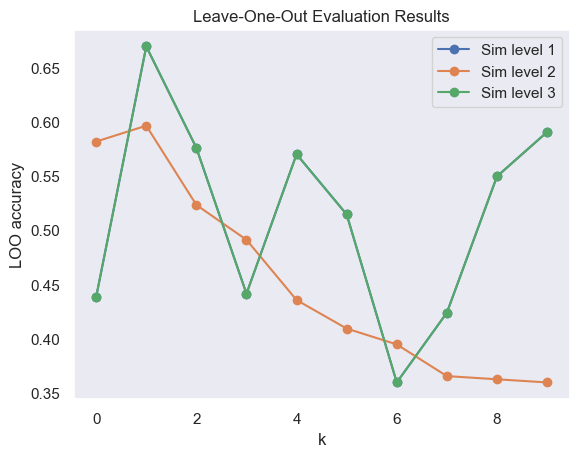

In [19]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.\n")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

In [166]:
def softmax(capacity):
    """
    Softmax function to optimize Choquet capacity
    """
    # get capacity from mu
    x = np.array([capacity[i].mu for i in range(len(capacity))])
    # Compute softmax
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)  # only difference

In [167]:
def generate_capacity_from_vector(X):
    """
    Converts a NumPy array of mu values into a list of Capacity objects.
    
    :param mu_vec: NumPy array containing capacity values.
    :param X: List of values to associate with each Capacity object.
    :return: List of Capacity objects.
    """
    capacity = generate_capacity(enumerate_permute_unit(X))
    return capacity


In [168]:
import copy

In [169]:
def FuzzLOO(DS, mu, time_counter=False):
    """ Classifieur * tuple[array, array] -> float
    """
    ###################### A COMPLETER 
    pt = 0
    Xm, Ym = DS

    C = KNNFuzz(input_dimension=Xm.shape[1], mu=mu, k=1, sim=S1)

    if time_counter:
        tic = time.time()
    for i in range(len(Xm)):
        Xtest, Ytest = Xm[i], Ym[i]
        
        Xapp, Yapp = np.array(list(Xm[:i])+list(Xm[i+1:])), np.array(list(Ym[:i])+list(Ym[i+1:]))
    
        cl = copy.deepcopy(C)
        cl.train(Xapp,Yapp)

        if cl.accuracy([Xtest], [Ytest]) == 1 : pt+=1

    if time_counter:
        toc = time.time()
        print(f'Result in {(toc-tic):0.4f} seconds.')
    
    return pt/len(Xm)

In [170]:
def fitness_function(X):
    """
    Objective function for PySwarms:
    - X is a 2D array of shape (n_particles, n_features)
    - Each row is a μ vector
    Returns:
    - 1D array of negative LOO accuracy (minimize)
    """
    results = []
    for x in X:
        # You may apply softmax here if needed:
        mu_soft = np.exp(x - np.max(x))
        mu_soft /= mu_soft.sum()

        # Create capacity from vector
        capacity = generate_capacity_from_vector(x)

        # Evaluate LOO accuracy (you should have a function for that)
        acc = FuzzLOO((data, labels), capacity)
        results.append(-acc)  # we minimize in PySwarms

    return np.array(results)


In [171]:
import pyswarms as ps

In [172]:
# ---- Bounds and Particle Settings ----
n_features = len(mu)  # size of μ
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# μ values between 0 and 1
bounds = (np.zeros(n_features), np.ones(n_features))

In [173]:
len(mu)

8

In [189]:
optimizer = ps.single.GlobalBestPSO(
    n_particles=4, dimensions=len(mu), options=options, bounds=bounds
)

best_cost, best_mu = optimizer.optimize(fitness_function, iters=100)


2025-05-04 22:25:31,446 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-0.35
2025-05-04 23:02:05,940 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.35, best pos: [0.39333163 0.31977509 0.78440814 0.63829853 0.40468543 0.39319817
 0.51152298 0.97094493]


In [190]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

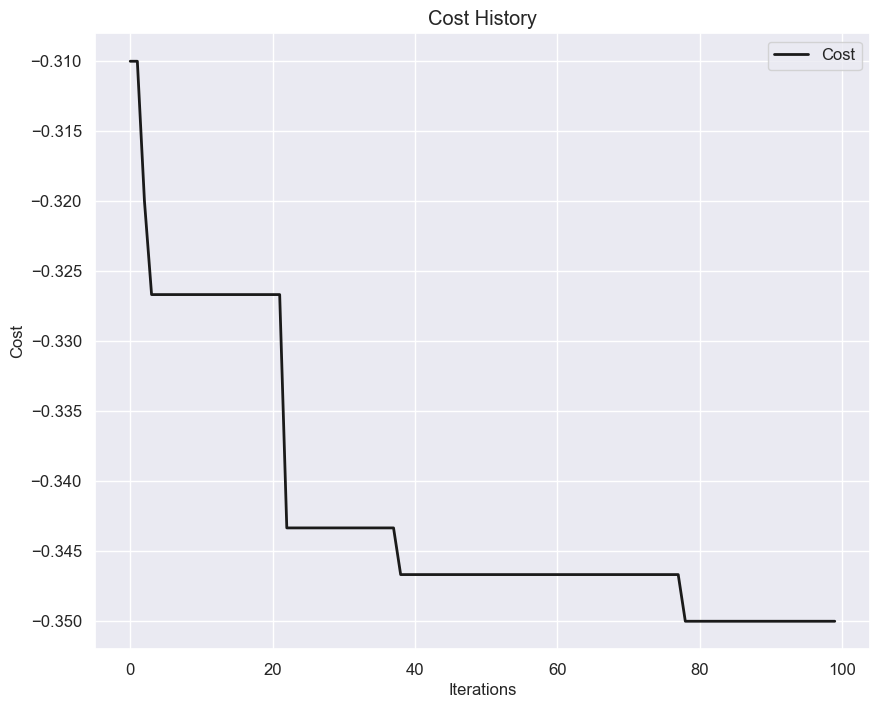

In [191]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [192]:
from pyswarms.utils.plotters.formatters import Mesher
from IPython.display import Image

In [193]:
# Initialize mesher with sphere function
m = Mesher(func=fitness_function)

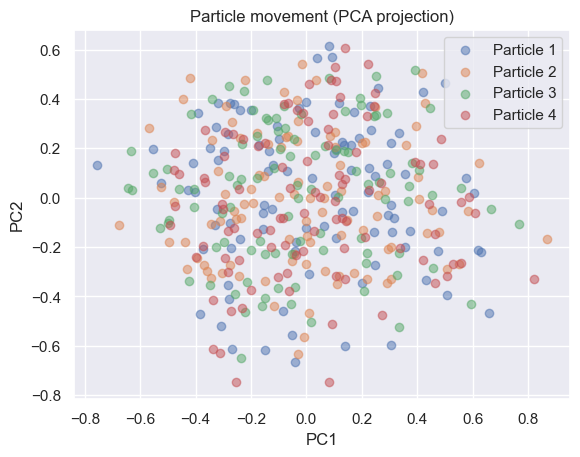

In [197]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the history to 2D
positions = np.array(optimizer.pos_history)  # shape: (n_iterations, n_particles, n_dimensions)
n_iters, n_particles, n_dims = positions.shape

# Flatten and apply PCA
positions_flat = positions.reshape(-1, n_dims)
pca = PCA(n_components=2)
positions_2d = pca.fit_transform(positions_flat)
positions_2d = positions_2d.reshape(n_iters, n_particles, 2)

# Plot trajectory
for p in range(n_particles):
    traj = positions_2d[:, p, :]
    plt.scatter(traj[:, 0], traj[:, 1], alpha=0.5, label=f"Particle {p+1}")
plt.title("Particle movement (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend()
plt.show()


In [204]:
# Reduce position history to only first 10 iterations
short_pos_history = optimizer.pos_history[:1]
pos_history_3d = m.compute_history_3d(short_pos_history)


In [205]:
np.array(optimizer.pos_history[:1]).shape

(1, 4, 8)

In [207]:
# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

ValueError: Capacity not found for the given values.

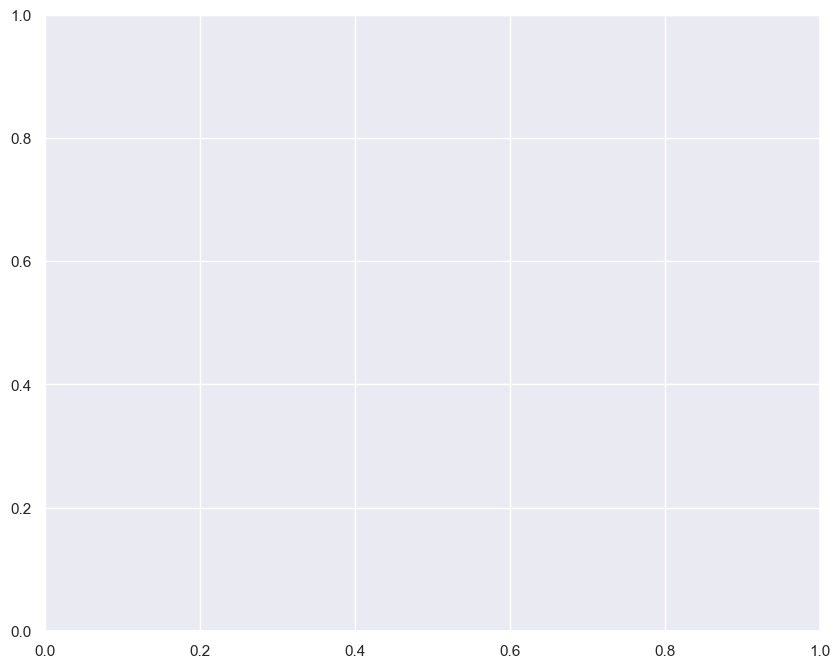

In [208]:
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))  